In [1]:
import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
import statistics
from CatEncoder import *
import random
import pickle
from sklearn.model_selection import KFold
from DataMutation import change_label

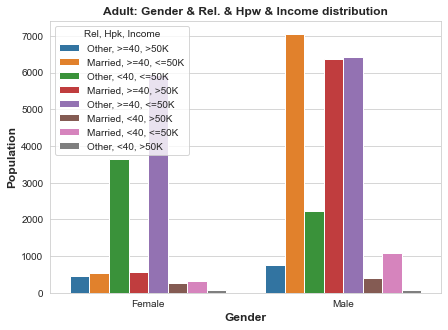

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("tab10")
import matplotlib.pyplot as plt
df_copy = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/data_preprocess/directed/adult_train.csv'))
df_copy.rename(index=str, columns={"hours-per-week": "hpw"}, inplace=True)
sns.color_palette("tab10")
plt.figure(figsize=(7, 5))
hue = df_copy[['relationship', 'hpw', 'Probability']].apply(
    lambda row: f"{row.relationship}, {row.hpw}, {row.Probability}", axis=1)
hue.name = 'Rel, Hpk, Income'
ax = sns.countplot(x="sex", hue=hue, data=df_copy)


plt.title('Adult: Gender & Rel. & Hpw & Income distribution', size=12, fontweight='bold')
plt.xlabel('Gender', size=12, fontweight='bold')
plt.ylabel('Population', size=12, fontweight='bold')
plt.show()

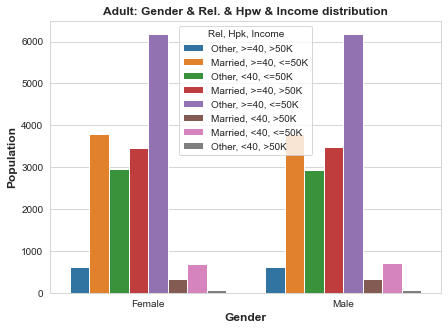

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df_copy = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/mutant/directed/sex_rel_hpw_recover/10/sex_rel_hpw_recover10_3.csv'))
df_copy.rename(index=str, columns={"hours-per-week": "hpw"}, inplace=True)
sns.color_palette("tab10")
plt.figure(figsize=(7, 5))
hue = df_copy[['relationship', 'hpw', 'Probability']].apply(
    lambda row: f"{row.relationship}, {row.hpw}, {row.Probability}", axis=1)
hue.name = 'Rel, Hpk, Income'
ax = sns.countplot(x="sex", hue=hue, data=df_copy)


plt.title('Adult: Gender & Rel. & Hpw & Income distribution', size=12, fontweight='bold')
plt.xlabel('Gender', size=12, fontweight='bold')
plt.ylabel('Population', size=12, fontweight='bold')
plt.show()


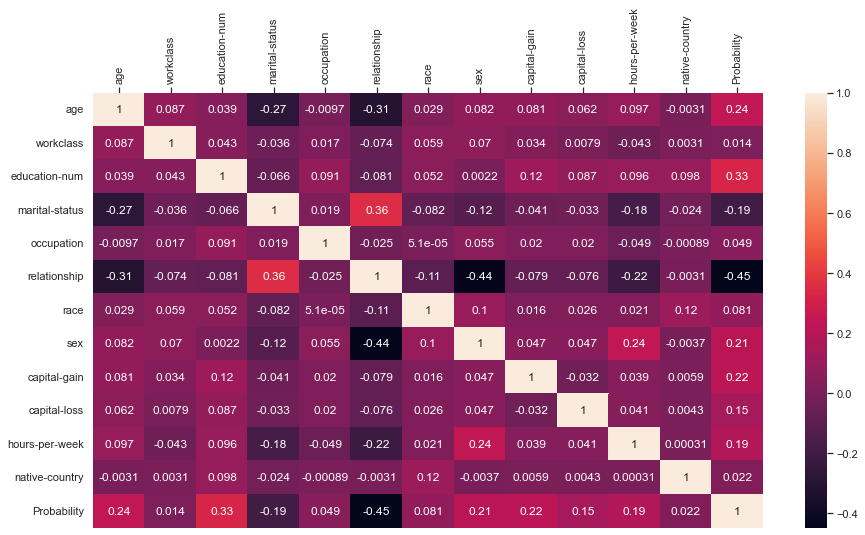

In [4]:
# Get corr matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

dataset_orig = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/data_preprocess/directed/adult_train.csv'))
df = copy.deepcopy(dataset_orig)
cat_features = list(df.select_dtypes(['object']).columns)
cat_features.remove('sex')
cat_features.remove('race')
cat_features.remove('Probability')

## Encode categorical features
multi = MultiColumnLabelEncoder(columns=cat_features)
df = multi.fit_transform(df)

df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['race'] = np.where(df['race'] != 'White', 0, 1)
df['Probability'] = np.where(df['Probability'] == '<=50K', 0, 1)


corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True

)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.show()

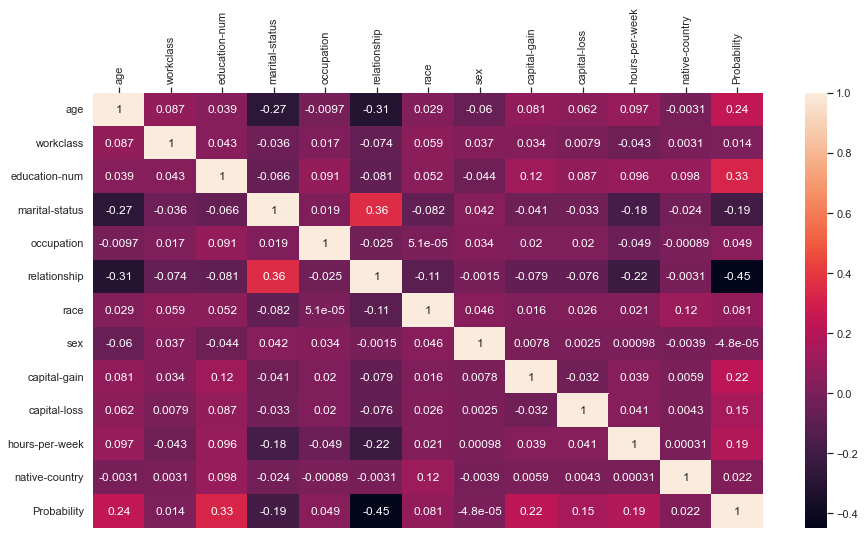

In [5]:
# Get corr matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

dataset_orig = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/mutant/directed/sex_rel_hpw_recover/10/sex_rel_hpw_recover10_3.csv'))
df = copy.deepcopy(dataset_orig)
cat_features = list(df.select_dtypes(['object']).columns)
cat_features.remove('sex')
cat_features.remove('race')
cat_features.remove('Probability')

## Encode categorical features
multi = MultiColumnLabelEncoder(columns=cat_features)
df = multi.fit_transform(df)

df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['race'] = np.where(df['race'] != 'White', 0, 1)
df['Probability'] = np.where(df['Probability'] == '<=50K', 0, 1)


corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True

)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.show()